In [6]:
import numpy as np

import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPool2D

In [7]:
batch_size = 128
num_classes = 10
epochs = 20

In [8]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 11s 3us/step


In [11]:
x_train.shape

(60000, 28, 28)

# Data Preprocess (데이터 전처리)

In [12]:
height = 28
width = 28

In [13]:
# 데이터의 shape가 28, 28만 있기 때문에 gray scale에 맞춰 (28, 28, 1)로 맞추어 준다.
x_train = x_train.reshape(x_train.shape[0], height, width, 1)
x_test = x_test.reshape(x_test.shape[0], height, width, 1)

x_train.shape

(60000, 28, 28, 1)

In [14]:
x_train.dtype

dtype('uint8')

In [15]:
# 계산이 용이 하도록 데이터 형태를 float32로 변환
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [16]:
x_train.min(), x_train.max()

(0.0, 255.0)

In [17]:
x_train = (x_train - x_train.min()) / (x_train.max() - x_train.min())
x_test = (x_test - x_test.min()) / (x_test.max() - x_test.min())
x_train.min(), x_train.max()

(0.0, 1.0)

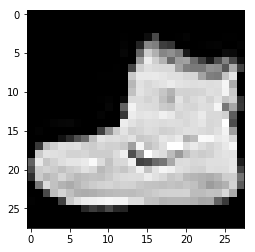

In [18]:
import matplotlib.pyplot as plt
% matplotlib inline

plt.imshow(x_train[0, :, :, 0], 'gray')
plt.show()

In [19]:
y_train = keras.utils.to_categorical(y_train, num_classes=num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes=num_classes)
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [20]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28, 1), (60000, 10), (10000, 28, 28, 1), (10000, 10))

# Build Model

In [21]:
input_shape = (height, width, 1)

In [22]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))  # 처음에만 input_shape를 지정. 후에는 이미 Output_shape을 알기 때문에 불필요 
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [23]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(0.001),
              metrics=['accuracy'])

# Train Model

In [ ]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1, # Kerase 자체에서 Display를 제공. 0~2까지 있다. 값이 높으면 높을 수록 학습 속도에 영향.
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1088s 18ms/step - loss: 0.4269 - acc: 0.8486 - val_loss: 0.3141 - val_acc: 0.8887
Epoch 2/20
31872/60000 [==============>...............] - ETA: 9:01 - loss: 0.2687 - acc: 0.9024

In [ ]:
score = model.evaluate(x_test, y_test)

In [ ]:
print("Test Loss:\t", score[0])
print("Test Accuracy:\t", score[1])